<a href="https://colab.research.google.com/github/e-apprentice/DM/blob/main/Motobike_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1

In [ ]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 45.5/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="a7ixfLNh5wtqHUYhxvQf")
project = rf.workspace("cdio-zmfmj").project("motobike-detection")
dataset = project.version(10).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
ls -la /content/datasets/

total 16
drwxr-xr-x 3 root root 4096 Jul  9 13:46 ./
drwxr-xr-x 1 root root 4096 Jul  9 13:54 ../
drwxr-xr-x 2 root root 4096 Jul  9 13:46 Motobike-Detection-10/


In [ ]:
ls -la /content/datasets/Motobike-Detection-10/

total 132668
drwxr-xr-x 2 root root      4096 Jul  9 13:46 ./
drwxr-xr-x 3 root root      4096 Jul  9 13:46 ../
-rw-r--r-- 1 root root 135839744 Jul  9 13:46 roboflow.zip


In [ ]:
%cd /content/datasets/Motobike-Detection-10/
!unzip roboflow.zip

/content/datasets/Motobike-Detection-10
Archive:  roboflow.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of roboflow.zip or
        roboflow.zip.zip, and cannot find roboflow.zip.ZIP, period.


In [ ]:
!ls -la /content/datasets/Motobike-Detection-10/

total 132668
drwxr-xr-x 2 root root      4096 Jul  9 13:46 .
drwxr-xr-x 3 root root      4096 Jul  9 13:46 ..
-rw-r--r-- 1 root root 135839744 Jul  9 13:46 roboflow.zip


In [ ]:
!rm /content/datasets/Motobike-Detection-10/roboflow.zip
!rmdir /content/datasets/Motobike-Detection-10/

In [ ]:
%cd /content/datasets
from roboflow import Roboflow

rf = Roboflow(api_key="a7ixfLNh5wtqHUYhxvQf")
project = rf.workspace("cdio-zmfmj").project("motobike-detection")
dataset = project.version(10).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Motobike-Detection-10 in yolov8:: 100%|██████████| 6742/6742 [00:01<00:00, 6697.67it/s]


In [ ]:
!ls -la /content/datasets/Motobike-Detection-10/

total 32
drwxr-xr-x 5 root root 4096 Jul  9 14:00 .
drwxr-xr-x 3 root root 4096 Jul  9 14:00 ..
-rw-r--r-- 1 root root  257 Jul  9 14:00 data.yaml
-rw-r--r-- 1 root root 1368 Jul  9 14:00 README.dataset.txt
-rw-r--r-- 1 root root 1237 Jul  9 14:00 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Jul  9 14:00 test
drwxr-xr-x 4 root root 4096 Jul  9 14:00 train
drwxr-xr-x 4 root root 4096 Jul  9 14:00 valid


In [ ]:
!cat /content/datasets/Motobike-Detection-10/data.yaml

names:
- motobike
nc: 1
roboflow:
  license: CC BY 4.0
  project: motobike-detection
  url: https://universe.roboflow.com/cdio-zmfmj/motobike-detection/dataset/10
  version: 10
  workspace: cdio-zmfmj
test: test/images
train: train/images
val: valid/images


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/Motobike-Detection-10/data.yaml epochs=75 imgsz=640 batch=32

100% 49.7M/49.7M [00:00<00:00, 137MB/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(

In [ ]:
# Check the current directory structure
!ls -la /content/

total 50924
drwxr-xr-x 1 root root     4096 Jul  9 13:54 .
drwxr-xr-x 1 root root     4096 Jul  9 13:41 ..
drwxr-xr-x 4 root root     4096 Jul  7 19:54 .config
drwxr-xr-x 4 root root     4096 Jul  9 14:03 datasets
drwxr-xr-x 3 root root     4096 Jul  9 13:54 runs
-rw-r--r-- 1 root root 52117635 Jul  9 13:47 yolov8m.pt


In [ ]:
# Check if runs directory exists and what's in it
!ls -la /content/runs/detect/ 2>/dev/null || echo "runs directory not found"

total 12
drwxr-xr-x 3 root root 4096 Jul  9 13:54 .
drwxr-xr-x 3 root root 4096 Jul  9 13:54 ..
drwxr-xr-x 3 root root 4096 Jul  9 13:54 train


In [ ]:
# Search for the model files more broadly
!find /content -name "best.pt" -o -name "last.pt" 2>/dev/null

/content/datasets/runs/detect/train/weights/best.pt
/content/datasets/runs/detect/train/weights/last.pt


In [ ]:
# Check if they're in the current working directory
!pwd
!ls -la *.pt 2>/dev/null || echo "No .pt files in current directory"

/content/datasets
-rw-r--r-- 1 root root 52117635 Jul  9 14:02 yolov8m.pt
-rw-r--r-- 1 root root  6534387 Jul  9 14:03 yolov8n.pt


In [ ]:
# Look for any directory containing 'train' or 'detect'
!find /content -type d -name "*train*" -o -name "*detect*" 2>/dev/null

/content/datasets/Motobike-Detection-10/train
/content/datasets/runs/detect
/content/datasets/runs/detect/train
/content/runs/detect
/content/runs/detect/train


In [ ]:
from google.colab import files
print("Downloading model weights...")

# Fixed paths - your models are in /content/datasets/runs/detect/train/
try:
    files.download('/content/datasets/runs/detect/train/weights/best.pt')
    files.download('/content/datasets/runs/detect/train/weights/last.pt')
    print("✅ Model weights downloaded successfully!")
except Exception as e:
    print(f"❌ Error downloading weights: {e}")
    print("Checking available paths...")
    import os
    if os.path.exists('/content/datasets/runs/detect/train/weights/'):
        print("Available weight files:")
        for file in os.listdir('/content/datasets/runs/detect/train/weights/'):
            print(f"  - {file}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Model weights downloaded successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Copy models to Google Drive with fixed paths
try:
    !cp /content/datasets/runs/detect/train/weights/best.pt /content/drive/MyDrive/motorbike_best_model.pt
    !cp /content/datasets/runs/detect/train/weights/last.pt /content/drive/MyDrive/motorbike_last_model.pt
    print("✅ Models copied to Google Drive!")
except Exception as e:
    print(f"❌ Error copying to Drive: {e}")

# Create a complete backup folder
try:
    !mkdir -p /content/drive/MyDrive/motorbike_yolo_training_results/
    !cp -r /content/datasets/runs/detect/train/* /content/drive/MyDrive/motorbike_yolo_training_results/
    print("✅ Complete training results backed up to Drive!")
except Exception as e:
    print(f"❌ Error creating backup folder: {e}")

Mounted at /content/drive
✅ Models copied to Google Drive!
✅ Complete training results backed up to Drive!



📊 Training Results:


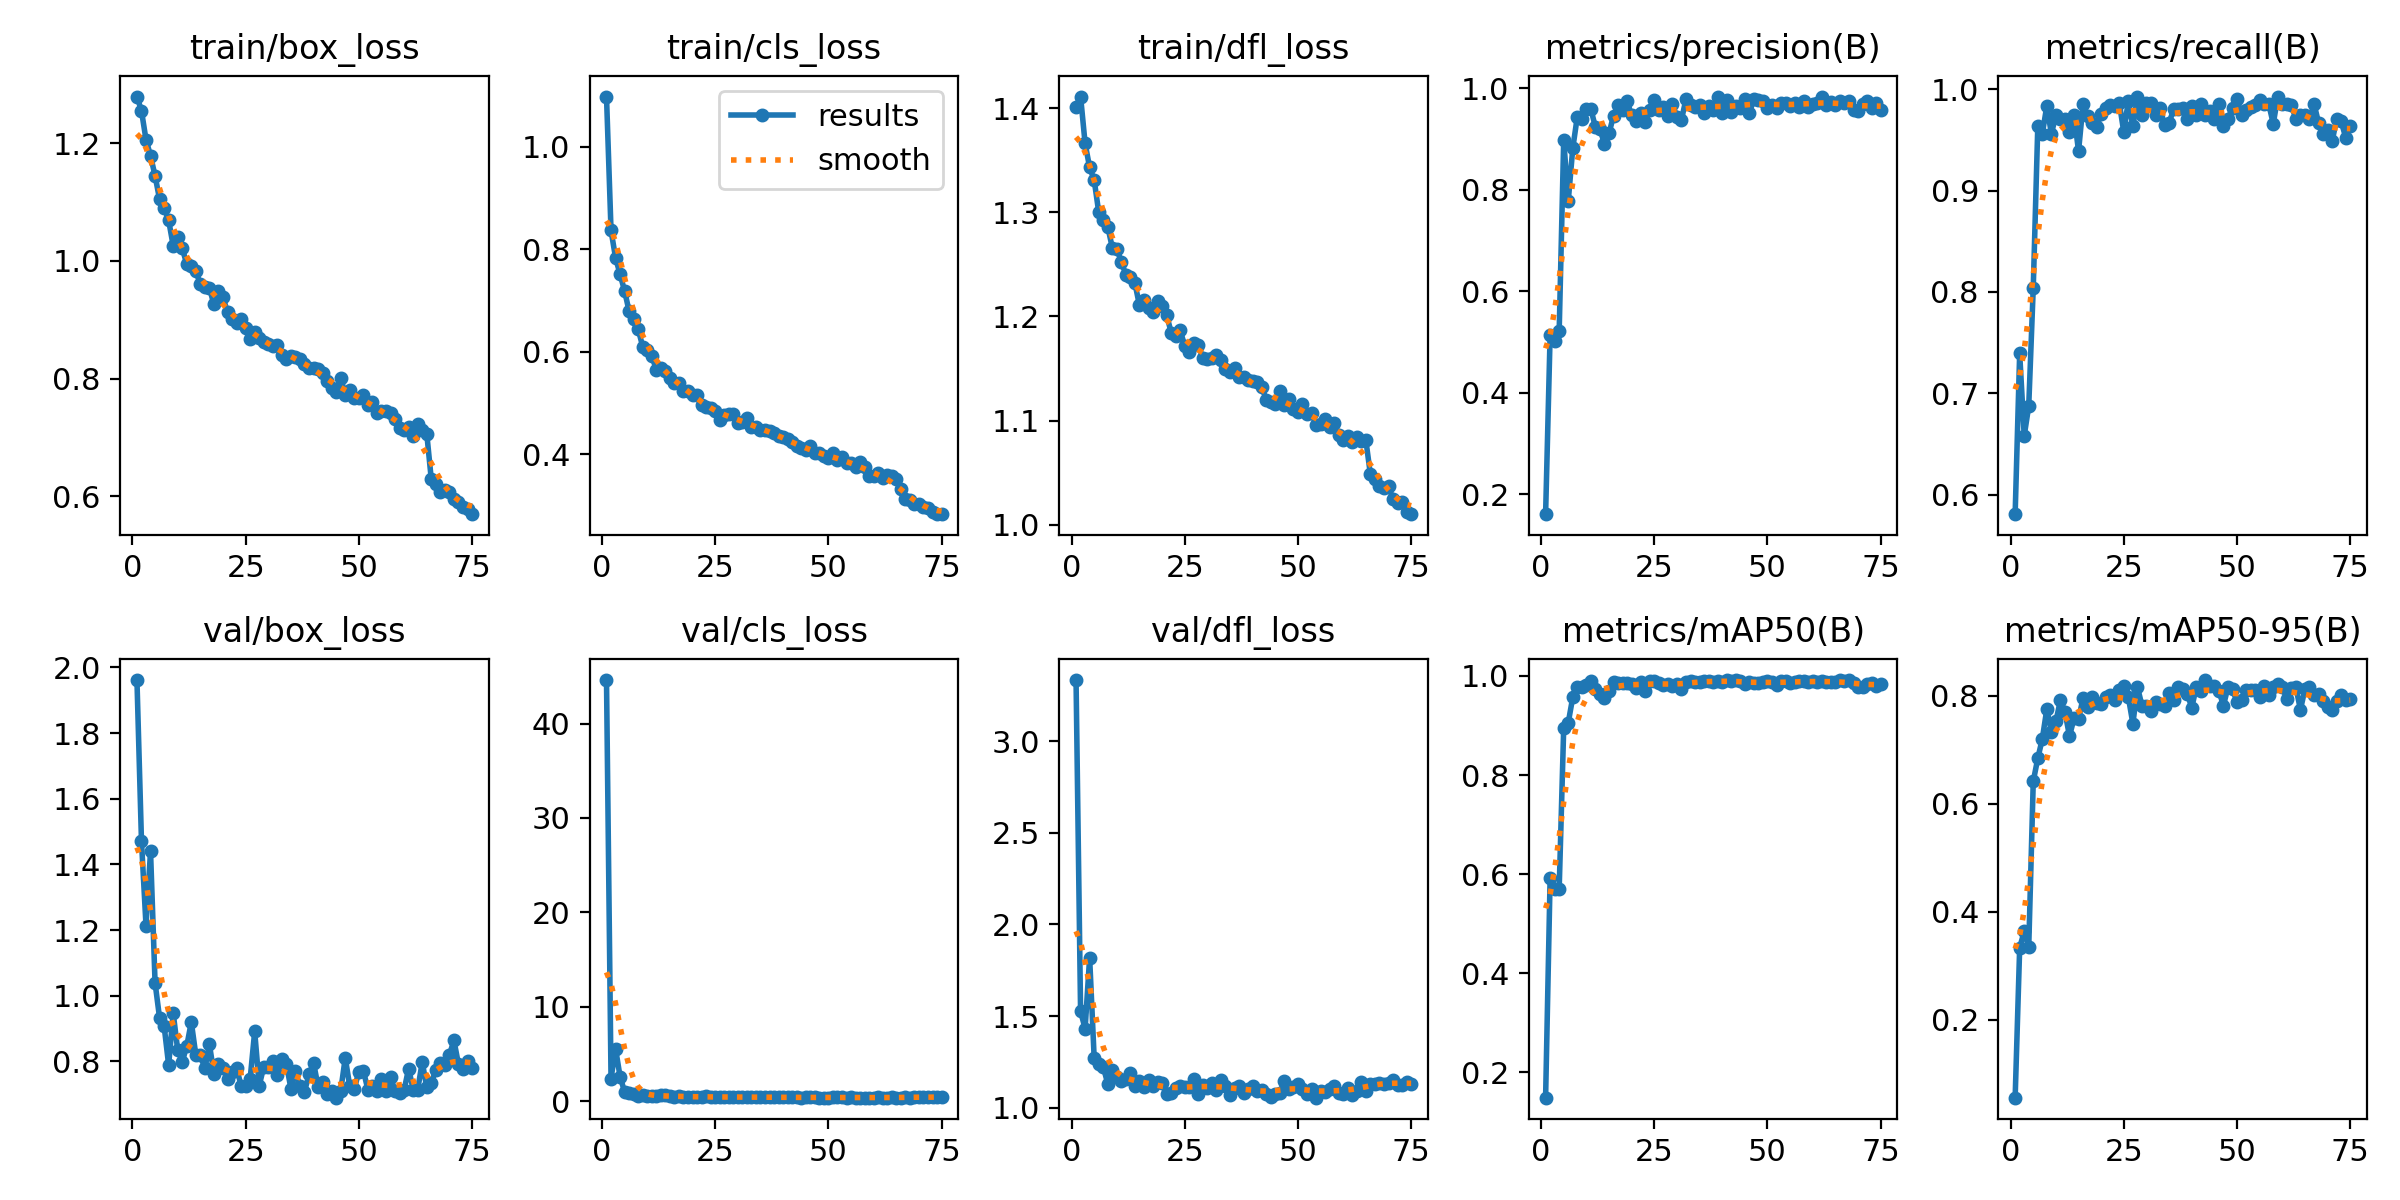

In [ ]:
from IPython.display import Image, display
import os

print("\n📊 Training Results:")
results_path = '/content/datasets/runs/detect/train/results.png'
if os.path.exists(results_path):
    display(Image(results_path, width=800))
else:
    print("Results chart not found at expected location")
    # Check what files are actually there
    train_dir = '/content/datasets/runs/detect/train/'
    if os.path.exists(train_dir):
        print("Files in training directory:")
        for file in os.listdir(train_dir):
            print(f"  - {file}")

In [ ]:
print("\n🚀 Quick test of your trained model:")
from ultralytics import YOLO

# Load your trained model with fixed path
try:
    model = YOLO('/content/datasets/runs/detect/train/weights/best.pt')
    print(f"✅ Model loaded successfully!")

    # Test on a sample from your dataset (if available)
    test_image_path = '/content/datasets/Motobike-Detection-10/test/images'
    if os.path.exists(test_image_path):
        test_images = os.listdir(test_image_path)
        if test_images:
            sample_image = os.path.join(test_image_path, test_images[0])
            print(f"\n🔍 Testing on sample image: {test_images[0]}")

            # Run inference
            results = model(sample_image)

            # Display results
            results[0].show()

            # Print detection details
            for r in results:
                print(f"Detected {len(r.boxes)} motorbike(s)")
                for box in r.boxes:
                    confidence = box.conf[0]
                    print(f"  - Confidence: {confidence:.3f}")
        else:
            print("No test images found")
    else:
        print("Test images directory not found")

except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Checking if model file exists...")
    if os.path.exists('/content/datasets/runs/detect/train/weights/best.pt'):
        print("✅ Model file exists!")
    else:
        print("❌ Model file not found")

print("\n🎉 Your motorbike detection model backup is complete!")
print("📁 All files have been backed up safely.")


🚀 Quick test of your trained model:
✅ Model loaded successfully!

🔍 Testing on sample image: 7829_frame_0004_png.rf.e60962deef5395607b1c5834b0ef4dde.jpg


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

image 1/1 /content/datasets/Motobike-Detection-10/test/images/7829_frame_0004_png.rf.e60962deef5395607b1c5834b0ef4dde.jpg: 640x640 1 motobike, 

❌ Error loading model: 'Results' object has no attribute 'show'. See valid attributes below.

    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes

In [ ]:
# ===== DISPLAY MOTORBIKE DETECTION RESULTS ONLY =====

from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

print("🚀 Loading your trained motorbike detection model...")

# Load your trained model
model = YOLO('/content/datasets/runs/detect/train/weights/best.pt')
print("✅ Model loaded successfully!")

# Test on a sample image from your dataset
test_image_path = '/content/datasets/Motobike-Detection-10/test/images'

if os.path.exists(test_image_path):
    test_images = os.listdir(test_image_path)
    if test_images:
        # Use the first test image
        sample_image = os.path.join(test_image_path, test_images[8])
        print(f"🔍 Testing on image: {test_images[6]}")

        # Run detection
        results = model(sample_image)

        # Display the results with bounding boxes
        result_img = results[0].plot()  # This creates the annotated image

        # Convert BGR to RGB for proper display
        result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

        # Display the result
        plt.figure(figsize=(12, 8))
        plt.imshow(result_img_rgb)
        plt.axis('off')
        plt.title('Motorbike Detection Results', fontsize=16)
        plt.show()

        # Print detection details
        for r in results:
            num_detections = len(r.boxes)
            print(f"🎯 Detected {num_detections} motorbike(s)")

            if num_detections > 0:
                for i, box in enumerate(r.boxes):
                    confidence = box.conf[0]
                    print(f"  Motorbike {i+1}: Confidence = {confidence:.3f} ({confidence*100:.1f}%)")
            else:
                print("  No motorbikes detected in this image")
    else:
        print("❌ No test images found")
else:
    print("❌ Test images directory not found")

print("\n💡 To test on your own image:")
print("model = YOLO('/content/datasets/runs/detect/train/weights/best.pt')")
print("results = model('your_image.jpg')")
print("result_img = results[0].plot()")
print("plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))")
print("plt.show()")

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
!git config --global user.email "agrimaregmi2004@gmail.com"
!git config --global user.name "e-apprentice"


In [ ]:
!git clone https://github.com/e-apprentice/Object-Detection.git
%cd Object-Detection


Cloning into 'Object-Detection'...
/content/Object-Detection/Object-Detection


In [ ]:
# Save current notebook
!cp /content/Motobike_Detection.ipynb Object-Detection/


cp: cannot stat '/content/Motobike_Detection.ipynb': No such file or directory


In [ ]:
!ls /content


Object-Detection  sample_data


In [ ]:
results = model('path/to/image.jpg')
results[0].show()  # For the first result

# Option 2: Plot and display
import matplotlib.pyplot as plt
results = model('path/to/image.jpg')
plotted = results[0].plot()
plt.imshow(plotted)
plt.show()

# Option 3: Save the annotated image
results = model('path/to/image.jpg')
results[0].save('output.jpg')  # Saves annotated image

# Option 4: Use the built-in predict method with show=True
model.predict('path/to/image.jpg', show=True, save=True)

NameError: name 'model' is not defined

In [ ]:
!pip install ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 19.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load your trained model (use the path where you saved it)
model = YOLO('/content/datasets/runs/detect/train/weights/best.pt')
# OR if you downloaded it locally and re-uploaded:
# model = YOLO('path/to/your/best.pt')

FileNotFoundError: [Errno 2] No such file or directory: '/content/datasets/runs/detect/train/weights/best.pt'

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load model from Google Drive backup
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/motorbike_best_model.pt')
# OR
model = YOLO('/content/drive/MyDrive/motorbike_yolo_training_results/best.pt')

Mounted at /content/drive
WARNING ⚠️ /content/drive/MyDrive/motorbike_best_model.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolo11n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 0.5s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/motorbike_yolo_training_results/best.pt'

In [ ]:
import os

print("Contents of MyDrive:")
for item in os.listdir('/content/drive/MyDrive/'):
    print(f"  {item}")

# Check if the motorbike_best_model.pt file exists
if os.path.exists('/content/drive/MyDrive/motorbike_best_model.pt'):
    print("\n✅ motorbike_best_model.pt found!")
else:
    print("\n❌ motorbike_best_model.pt not found")

# Look for any .pt files
print("\nSearching for .pt files in MyDrive:")
for root, dirs, files in os.walk('/content/drive/MyDrive/'):
    for file in files:
        if file.endswith('.pt'):
            print(f"  Found: {os.path.join(root, file)}")

Contents of MyDrive:
  Engineering Physics.pdf
  LAB#4.pdf
  LAB#4.gdoc
  ECM_old_questions.pdf
  Armature_Control.odt
  Field method.odt
  armature control.odt
  oop-lab 6 initial.doc
  ooplab7initial.docx
  ooplab7initial.odt
  lab 8.odt
  ectpdf_merged.pdf
  Tutorial 1.pdf
  Tutorial 2.pdf
  Tutorial 3.pdf
  Tutorial-4.pdf
  Agrima Regmi-THA078BEI003
  Untitled presentation (2).gslides
  lab1-2.pdf
  lab 2 instru-2.pdf
  control lab 1.pdf
  control lab 2.pdf
  lab3 control-3.pdf
  PLC-1.pdf
  lab1dsa.odt
  cglab1.pdf
  OUTPUT22.pdf
  cglabfinal.pdf
  acg2final.pdf
  everything
  Untitled document (3).gdoc
  proposal.gdoc
  Project.gslides
  Untitled document (2).gdoc
  os presentation.gslides
  Counting stars(reharse) (1).m4a
  punch card images
  hole_13.jpg
  image.jpg
  20250121212402.jpg
  Colab Notebooks
  NON HOLES
  midterm slides.gslides
  aug_aug_hole_13.jpg
  aug_20250121212402.jpg
  Untitled presentation (1).gslides
  Untitled document (1).gdoc
  Chapter 3_copy.pdf
  Agri

In [ ]:
# Complete setup after restart
!pip install ultralytics
from ultralytics import YOLO
from google.colab import drive
import matplotlib.pyplot as plt

# Mount drive
drive.mount('/content/drive')

# Load your model (try the backup folder version first)
model = YOLO('/content/drive/MyDrive/motorbike_yolo_training_results/weights/best.pt')

print("✅ Model loaded successfully!")
print(f"Model classes: {model.names}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
# Check if you have test images backed up
import os

test_paths = [
    '/content/drive/MyDrive/motorbike_yolo_training_results/test/images/',
    '/content/drive/MyDrive/test/images/',
    '/content/datasets/Motobike-Detection-10/test/images/'
]

for path in test_paths:
    if os.path.exists(path):
        print(f"✅ Found test images at: {path}")
        test_images = os.listdir(path)[:5]  # Show first 5
        print(f"Sample images: {test_images}")
        break
else:
    print("❌ No test images found in common locations.")
    print("Let's check what's in your backup folder:")
    backup_path = '/content/drive/MyDrive/motorbike_yolo_training_results/'
    if os.path.exists(backup_path):
        for item in os.listdir(backup_path):
            print(f"  {item}")

❌ No test images found in common locations.
Let's check what's in your backup folder:
  args.yaml
  confusion_matrix_normalized.png
  confusion_matrix.png
  events.out.tfevents.1752069783.1218149ef34e.6397.0
  F1_curve.png
  labels_correlogram.jpg
  labels.jpg
  P_curve.png
  PR_curve.png
  R_curve.png
  results.csv
  results.png
  train_batch0.jpg
  train_batch1.jpg
  train_batch2.jpg
  train_batch6175.jpg
  train_batch6176.jpg
  train_batch6177.jpg
  val_batch0_labels.jpg
  val_batch0_pred.jpg
  val_batch1_labels.jpg
  val_batch1_pred.jpg
  val_batch2_labels.jpg
  val_batch2_pred.jpg
  weights


✅ Test image downloaded!

image 1/1 /content/test_motorbike.jpg: 448x640 (no detections), 1328.9ms
Speed: 13.8ms preprocess, 1328.9ms inference, 10.1ms postprocess per image at shape (1, 3, 448, 640)


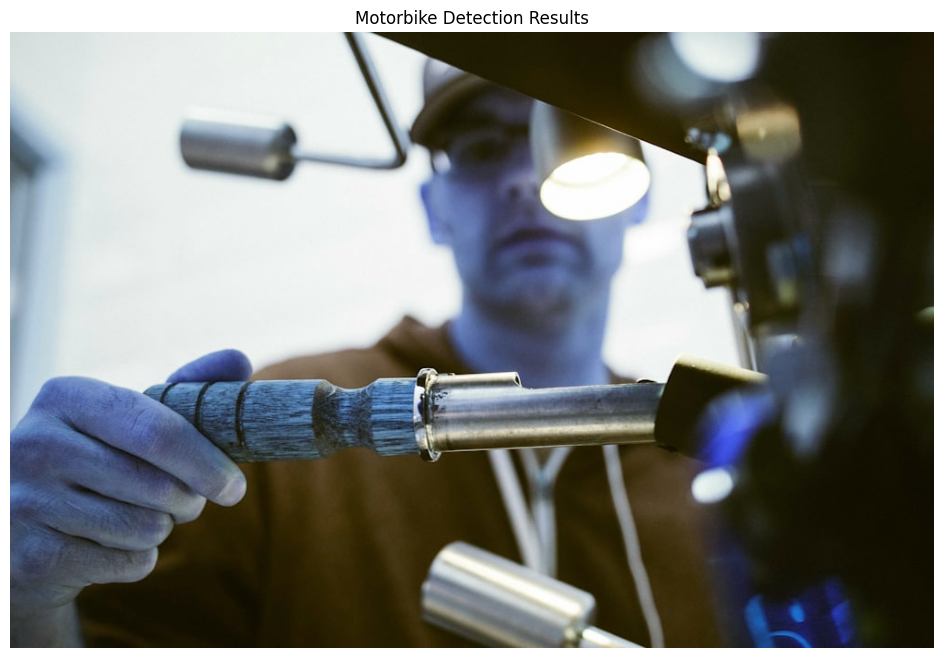

Detected 0 objects


In [ ]:
# Download a sample motorbike image to test
import urllib.request

# Download a test image
url = "https://images.unsplash.com/photo-1558618666-fcd25c85cd64?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1000&q=80"
urllib.request.urlretrieve(url, "test_motorbike.jpg")

print("✅ Test image downloaded!")

# Test your model
results = model("test_motorbike.jpg")

# Display results
plotted = results[0].plot()
plt.figure(figsize=(12, 8))
plt.imshow(plotted)
plt.axis('off')
plt.title('Motorbike Detection Results')
plt.show()

# Print detection details
print(f"Detected {len(results[0].boxes)} objects")
for i, box in enumerate(results[0].boxes):
    confidence = box.conf.item()
    class_name = results[0].names[int(box.cls)]
    print(f"Object {i+1}: {class_name} (confidence: {confidence:.2f})")

📊 Training Results:


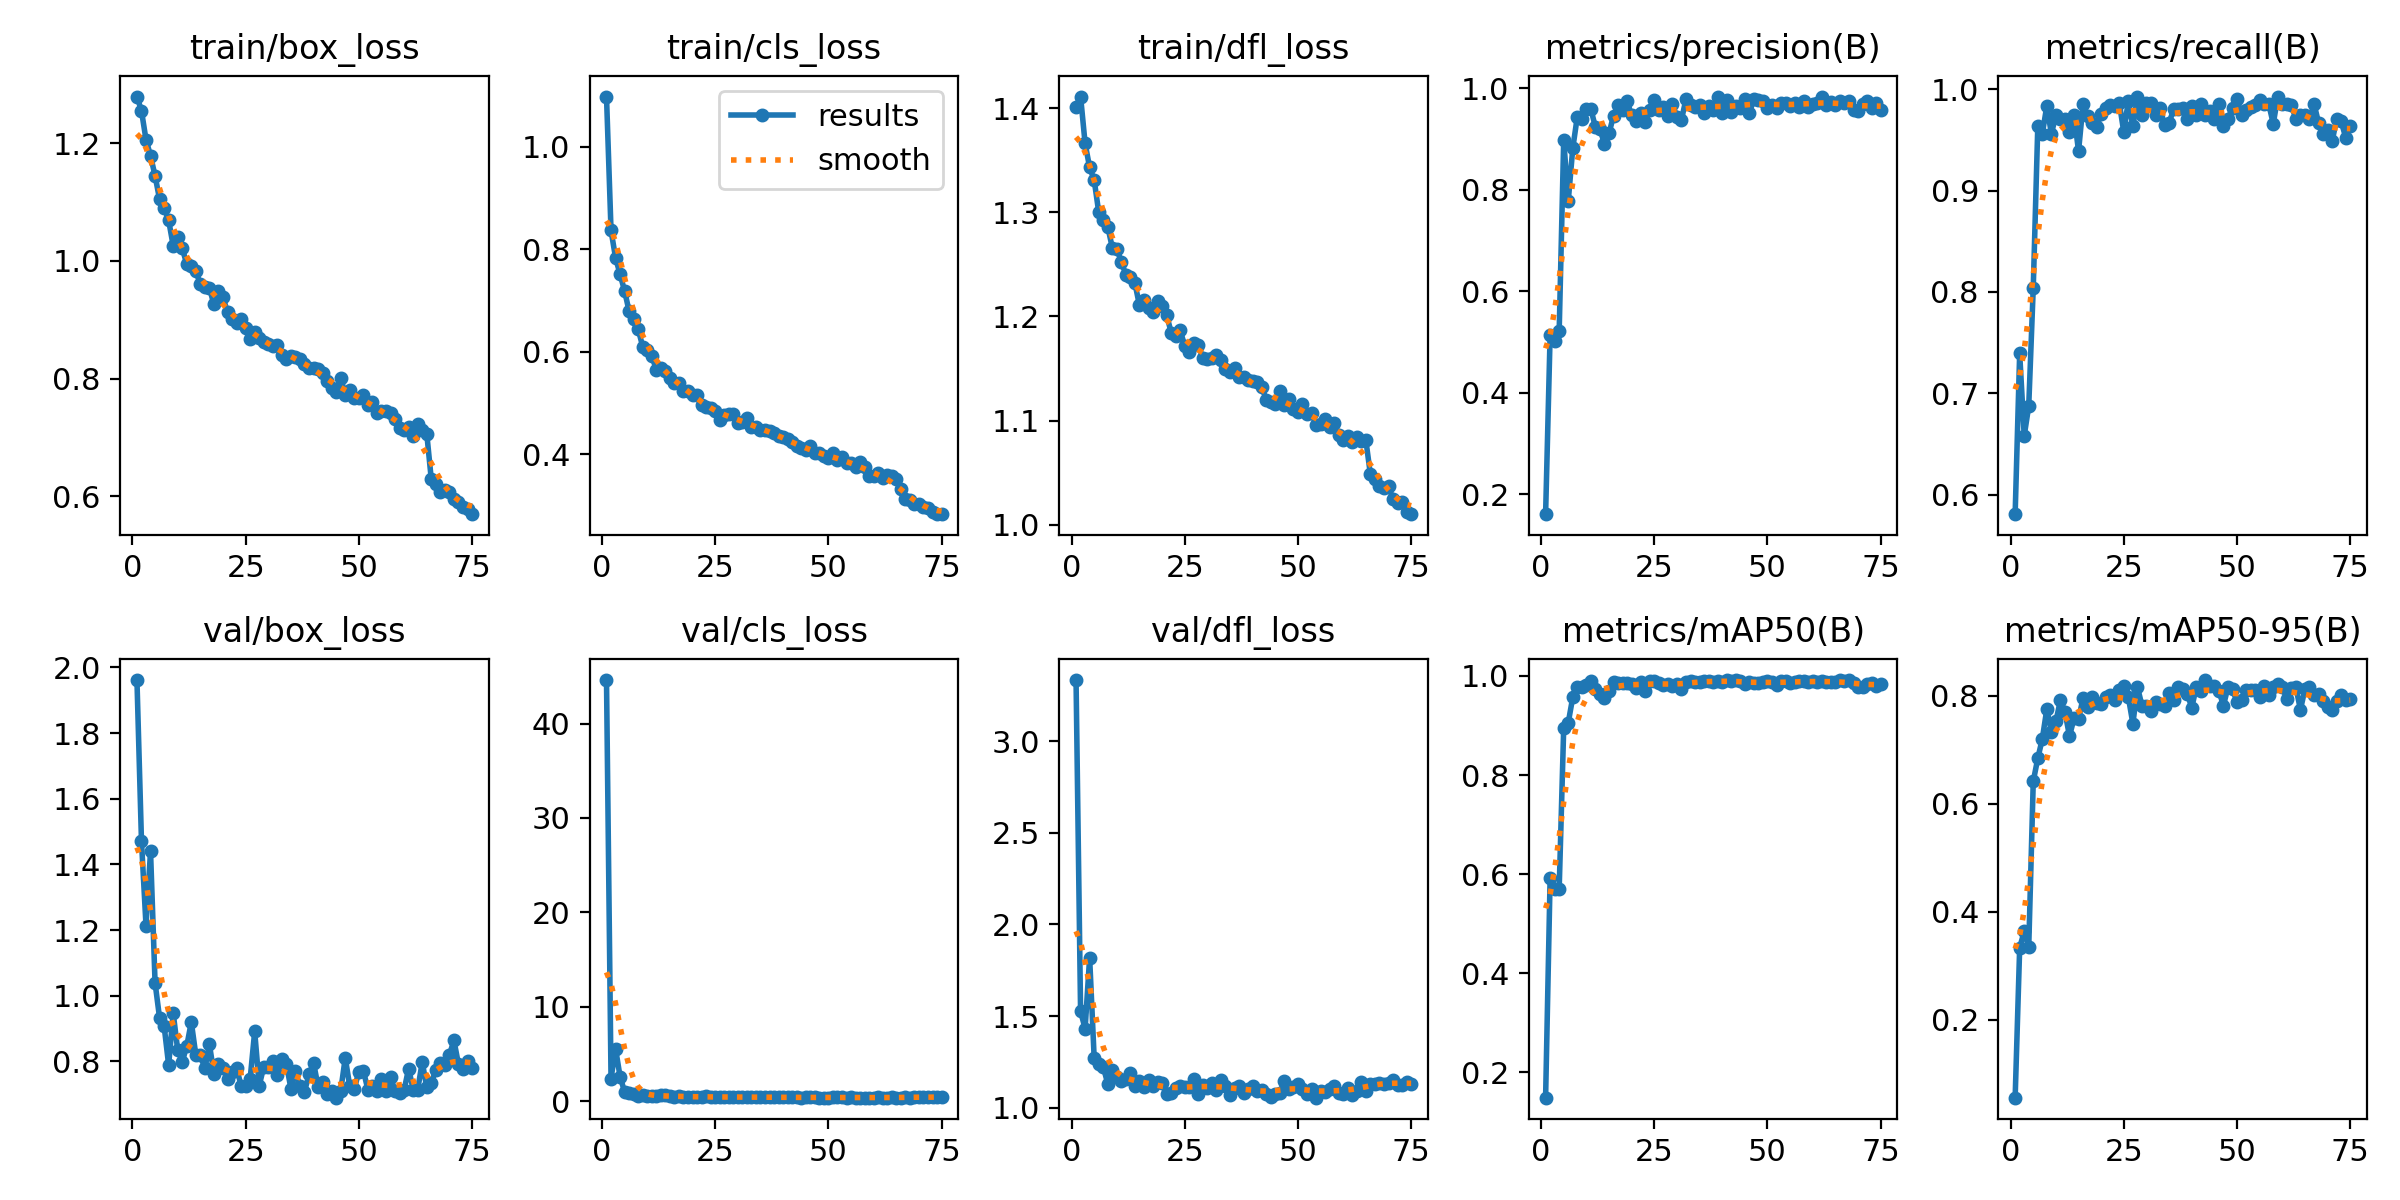


🎯 Confusion Matrix:


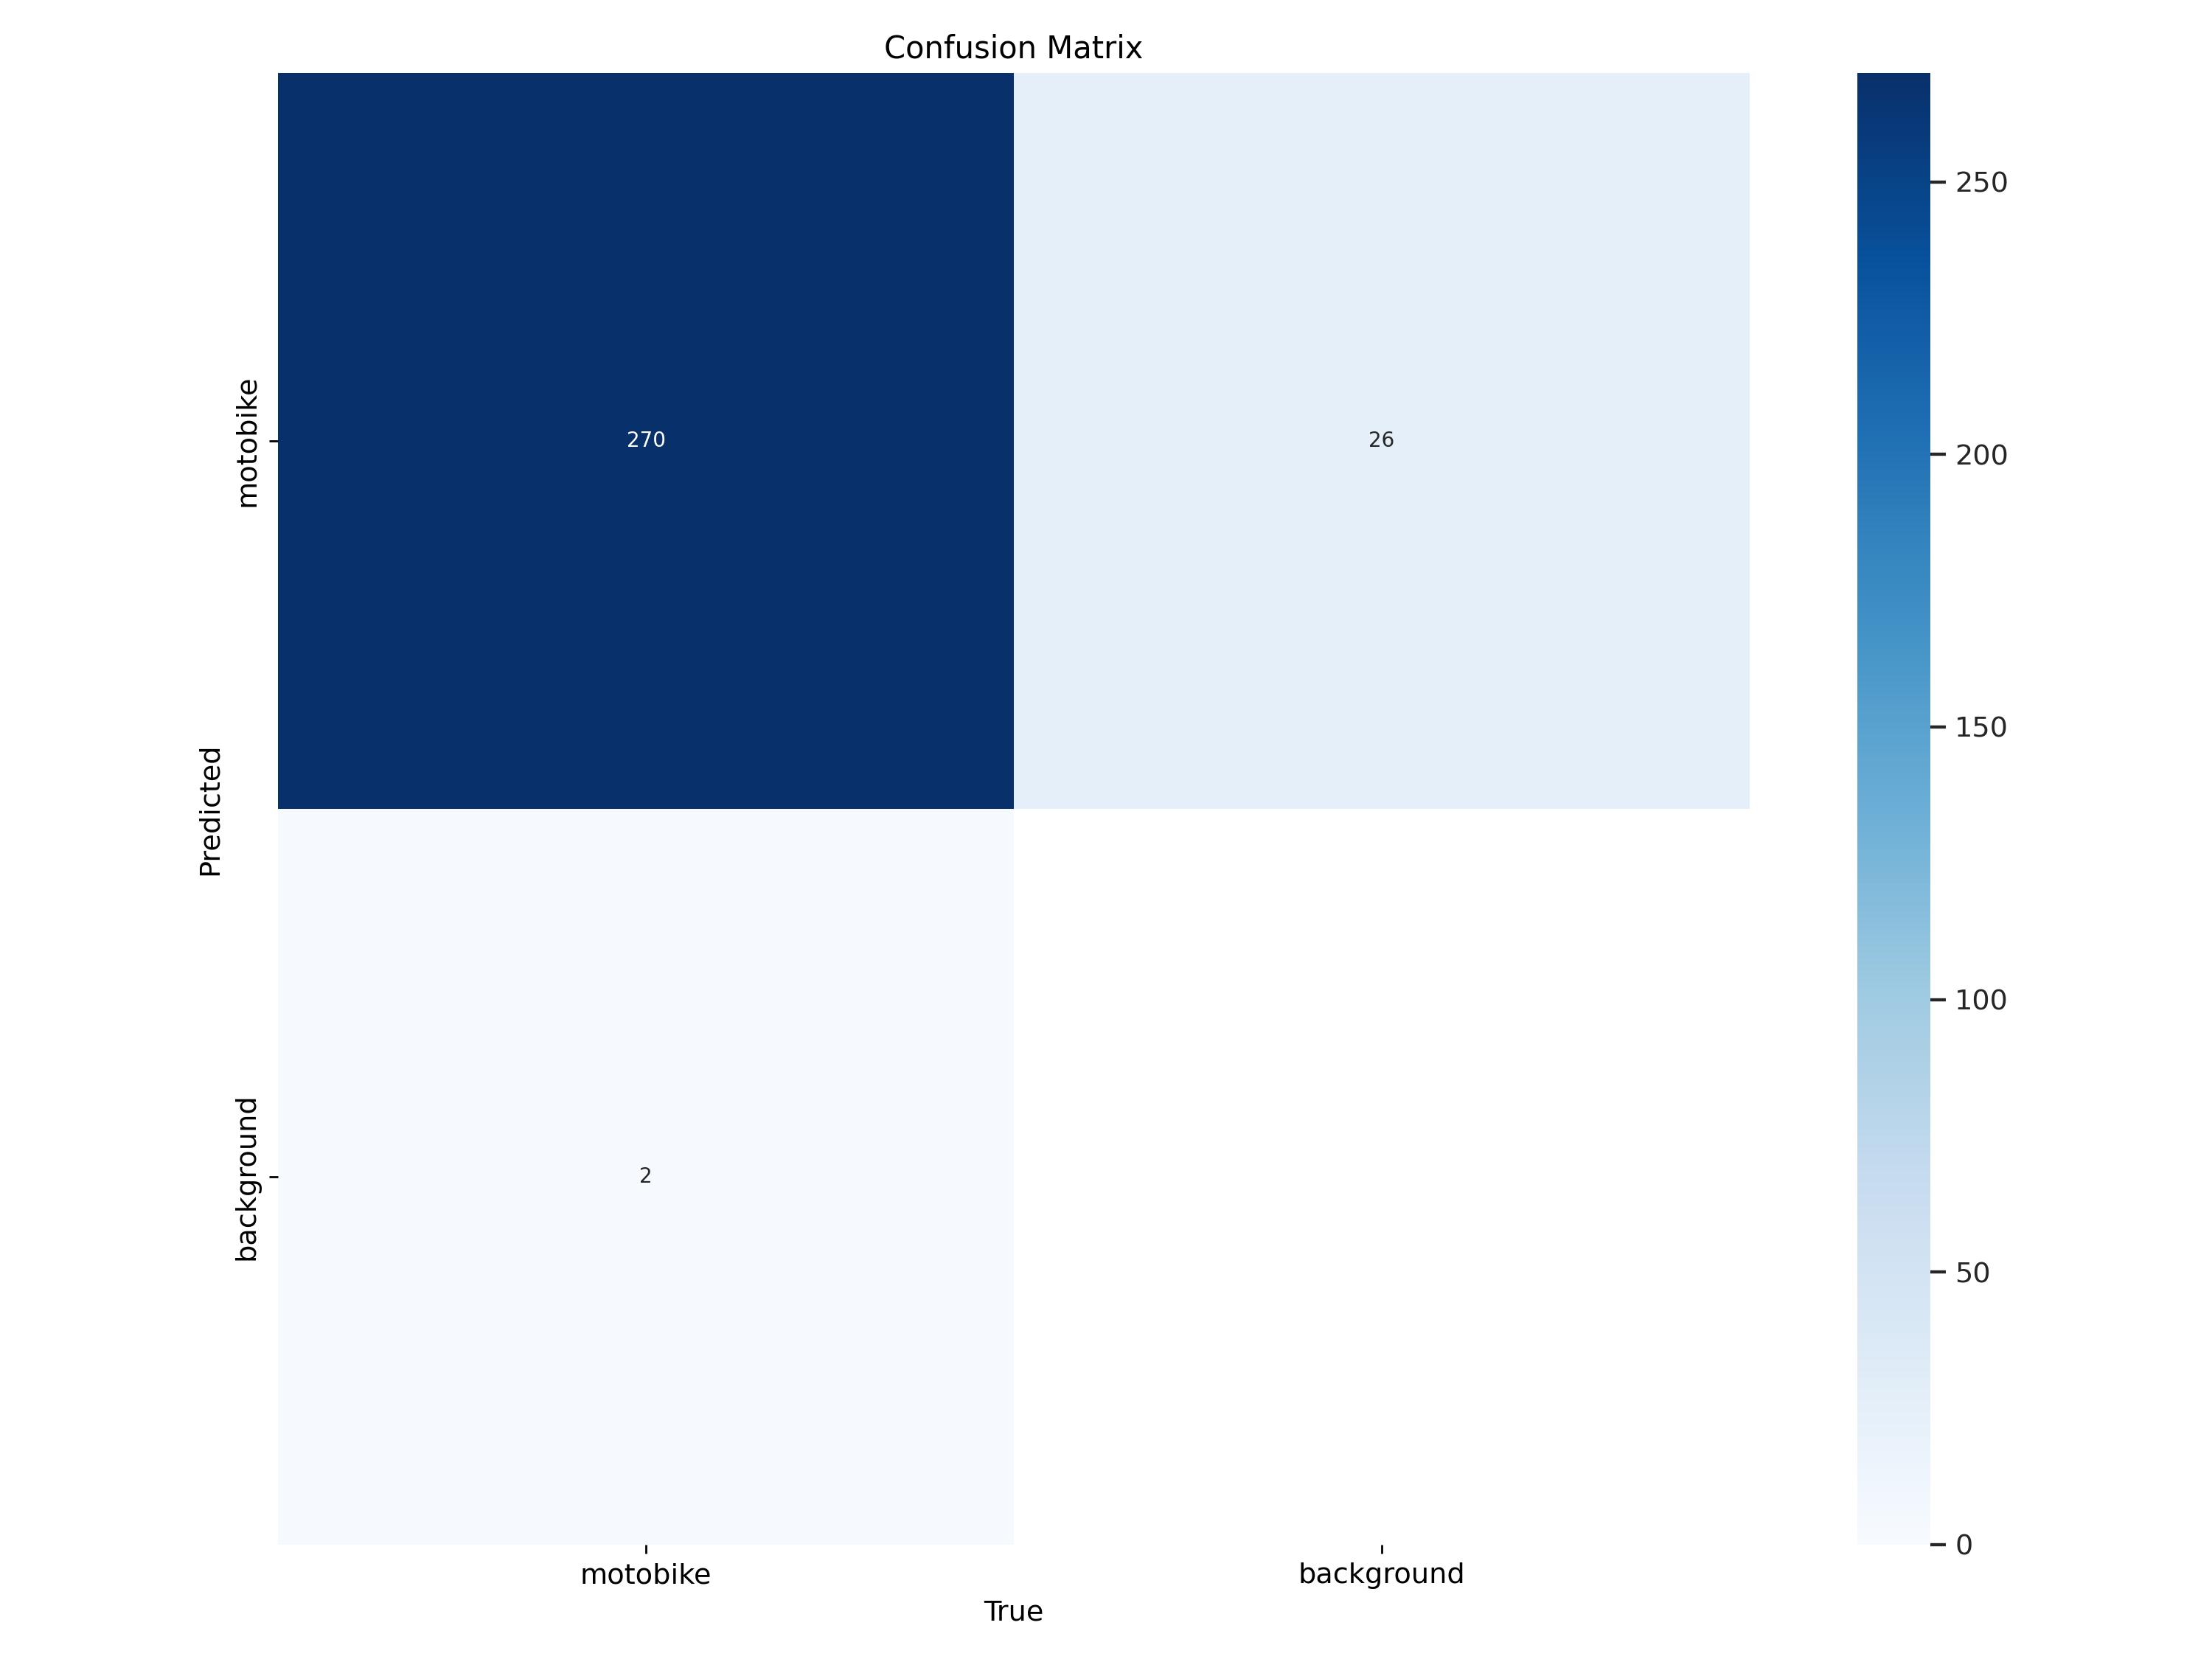


📸 Training Batch Examples:


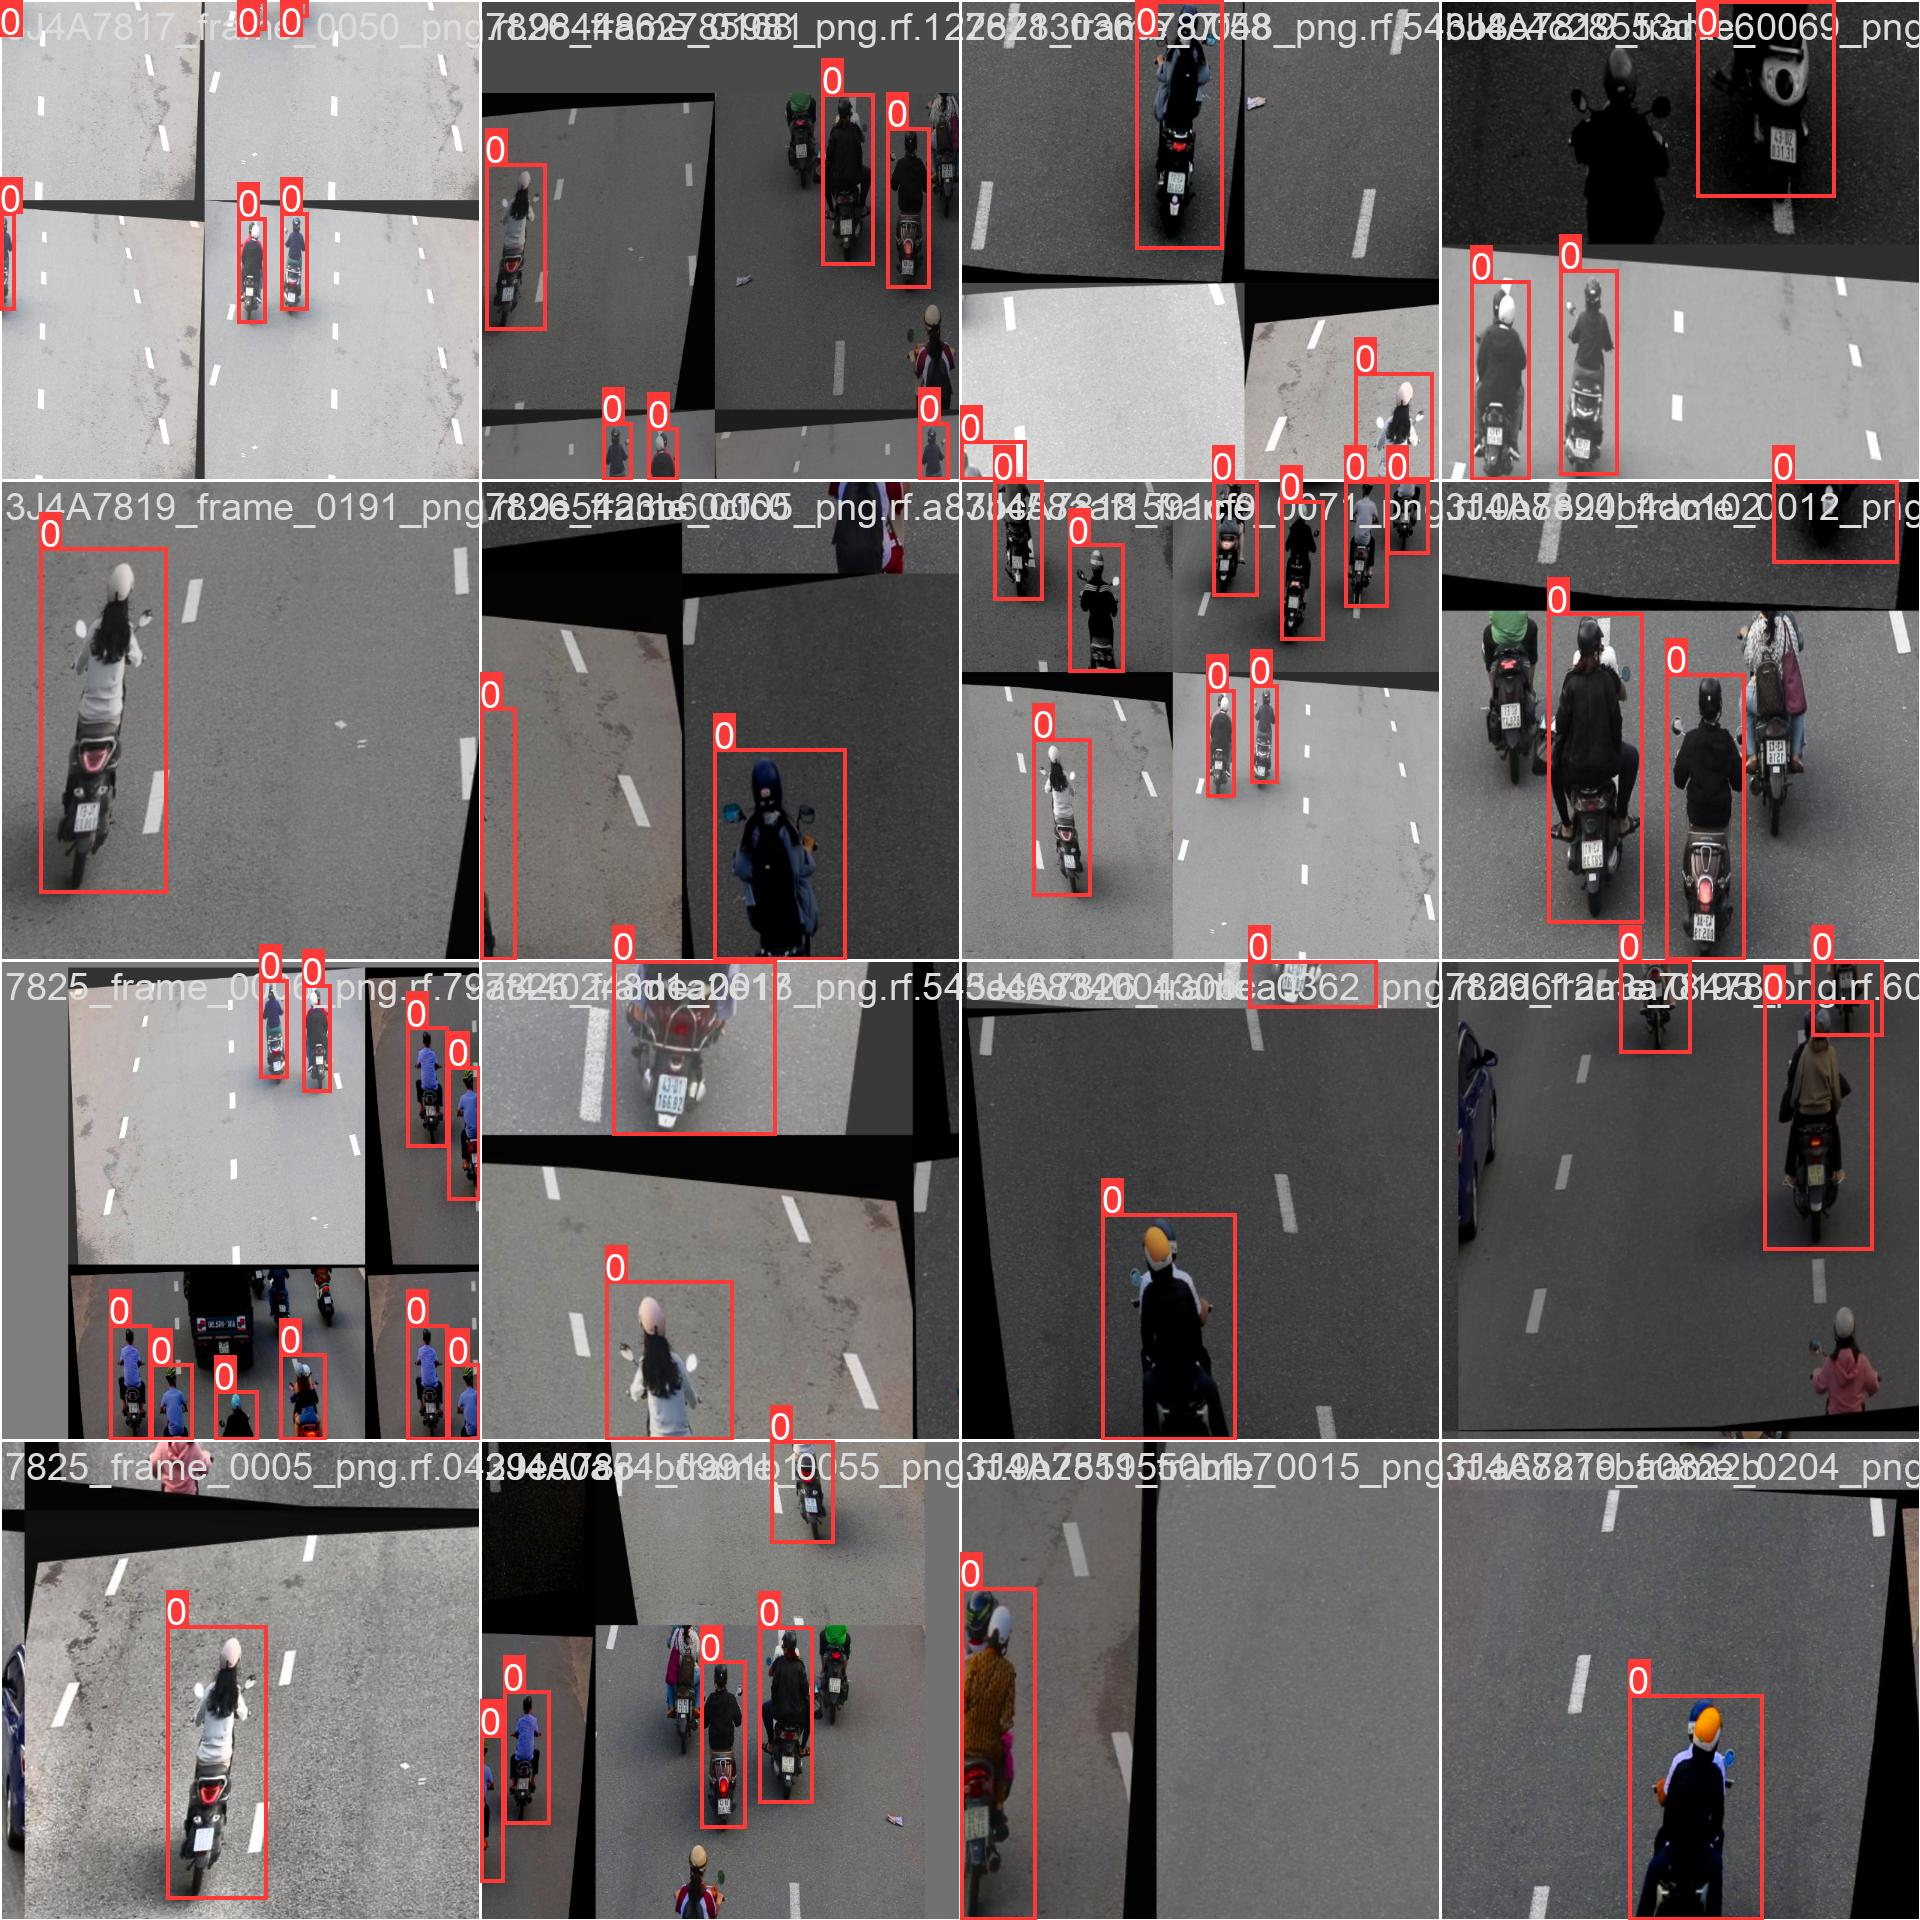

In [ ]:
# View training results
from IPython.display import Image, display
import matplotlib.pyplot as plt

print("📊 Training Results:")
results_path = '/content/drive/MyDrive/motorbike_yolo_training_results/'

# Show training curves
try:
    display(Image(results_path + 'results.png'))
except:
    print("Could not display results.png")

# Show confusion matrix
try:
    print("\n🎯 Confusion Matrix:")
    display(Image(results_path + 'confusion_matrix.png'))
except:
    print("Could not display confusion matrix")

# Show some training batch examples
try:
    print("\n📸 Training Batch Examples:")
    display(Image(results_path + 'train_batch0.jpg'))
except:
    print("Could not display training batch")